In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mexico = pd.read_csv("Mexico.csv")
mexico = mexico.drop(columns="Unnamed: 0", errors="ignore")
mexico

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,499553,"Deluxe 4-BR penthouse, views, historic center",1297488,Petra,NaN,Cuauhtémoc,19.436210,-99.138740,Entire home/apt,4985.0,3,26,2024-10-28,0.17,2,117,1,NaN
1,501037,The best cheap flat in La Condesa!!,1364145,Humberto,NaN,Cuauhtémoc,19.415780,-99.174250,Entire home/apt,1150.0,5,134,2024-12-03,0.89,2,232,23,NaN
2,517503,Nice big room near airport,2547499,Irma Adriana,NaN,Venustiano Carranza,19.437840,-99.079030,Private room,550.0,1,281,2024-12-11,3.43,1,339,52,NaN
3,527473,"Nuestro bello departamento, un paraíso en la C...",158585,Fernando,NaN,Cuauhtémoc,19.418870,-99.173330,Entire home/apt,3654.0,1,354,2024-12-02,2.35,1,216,32,NaN
4,544105,Polanco great location! Priv Room in Shared Apart,2674950,Elizabeth,NaN,Miguel Hidalgo,19.442892,-99.201385,Private room,1007.0,2,67,2024-11-26,0.74,1,173,9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,1318906185008171760,Suite Dumas Polanco 8D,369403303,Grissell,NaN,Miguel Hidalgo,19.436998,-99.196733,Private room,760.0,1,0,NaN,NaN,12,363,0,NaN
26277,1318960023050066631,Departamento amueblado en CDMX,525554527,Partner,NaN,Cuauhtémoc,19.449230,-99.136170,Entire home/apt,8897.0,1,0,NaN,NaN,1,365,0,NaN
26278,1318997244771691320,hospedaje en Coyoacán CDMX,293574406,Bellanira Isabel,NaN,Coyoacán,19.316820,-99.116781,Shared room,227.0,3,0,NaN,NaN,8,365,0,NaN
26279,1319078571963617776,3 recámaras 3 baños con estacionamiento,35255741,Juan,NaN,Miguel Hidalgo,19.400096,-99.172981,Entire home/apt,3125.0,1,0,NaN,NaN,31,359,0,NaN


In [4]:
mexico_vn=mexico.isnull().sum().sum()
mexico_vn

np.int64(62972)

**Desviación Estándar**

<Figure size 1500x800 with 0 Axes>

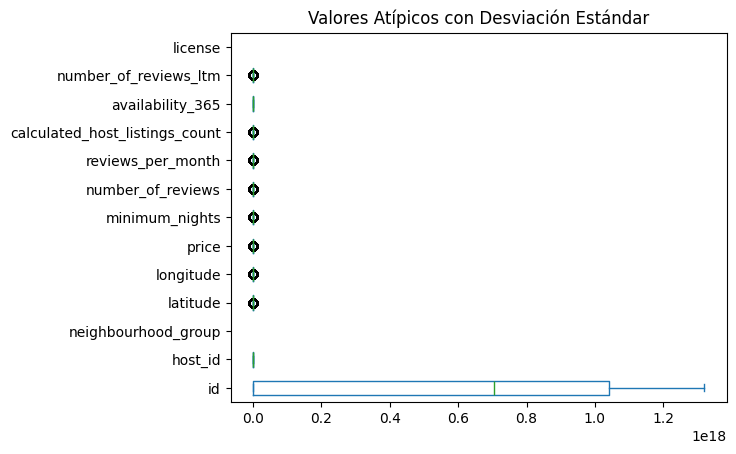

In [5]:
figsize_mexico = plt.figure(figsize=(15,8))
mexico.plot(kind="box", vert=False)
plt.title("Valores Atípicos con Desviación Estándar")
plt.show()

**Rango Intercuartílico**

<Figure size 1500x800 with 0 Axes>

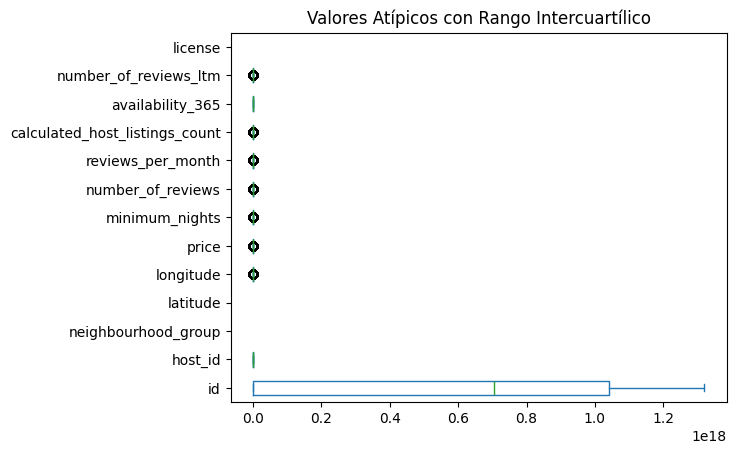

In [6]:
mexico_cuanti=mexico.select_dtypes(include=["float64","int64","float","int"])
mexico_cuali=mexico.select_dtypes(include=["object","datetime","category"])
y=mexico_cuanti

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75-percentile25

Limite_Superior_iqr= percentile75+1.5*iqr
Limite_Inferior_iqr= percentile25-1.5*iqr

iqr=mexico_cuanti[(y<=Limite_Superior_iqr)&y>=(Limite_Inferior_iqr)]
iqr2=iqr.fillna(round(iqr.mean(),1))
mexico_iqr=pd.concat([mexico_cuali,iqr2],axis=1)

figsize_mexico = plt.figure(figsize=(15,8))
mexico_iqr.plot(kind="box", vert=False)
plt.title("Valores Atípicos con Rango Intercuartílico")
plt.show()